In this dataset the purchased column indicates weather the particular user with age and estimated salary have bought the product or not by viewing the social ads of the product .
Now let's work on this dataset and check the result of RandomForestClassifier. 

In [21]:
import pandas as pd
import numpy as np
import sweetviz as sw
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

Let's read DataSet

In [22]:
sn=pd.read_csv("Social_Network_Ads.csv")

In [23]:
sn.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [24]:
sn.shape

(400, 3)

In [25]:
sn.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [26]:
sn_report = sw.analyze(sn)
sn_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


c:\Users\COMPUTER ME\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchased', ylabel='count'>

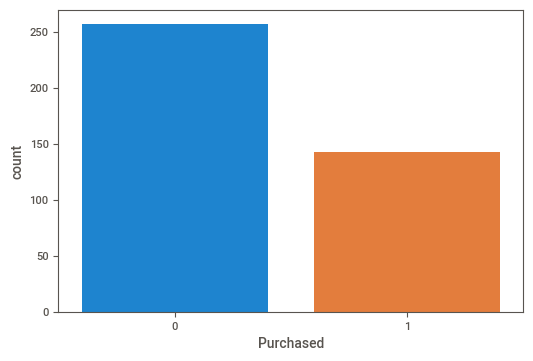

In [27]:
sns.countplot(sn['Purchased'],label="Count")

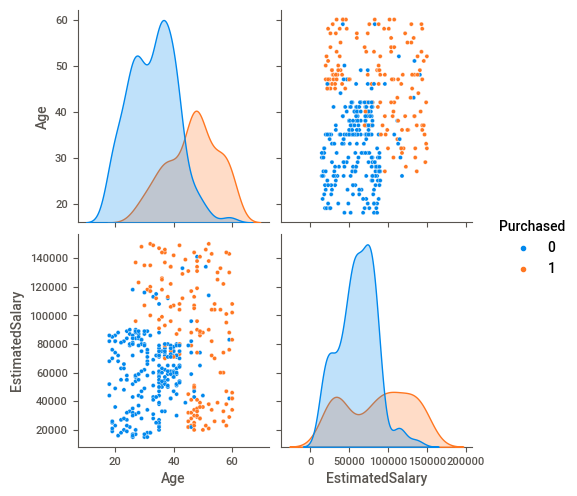

In [28]:
sns.pairplot(data=sn,hue='Purchased',diag_kind='kde')
plt.show()



In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score
X_train, X_test, y_train, y_test = train_test_split(sn.loc[:, sn.columns != 'Purchased'], 
                                                    sn['Purchased'], stratify=sn['Purchased'],test_size=.2 ,random_state=42)



In [30]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of RandomForest is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for RandomForest is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for RandomForest is :",recall_score(y_test, predicted,)*100, "%")

Confusion Matrix : 
 [[46  5]
 [ 3 26]]

The accuracy of RandomForest is :  90.0 %

Precision score for RandomForest is : 83.87096774193549 %

Recall score for RandomForest is : 89.65517241379311 %


The result of this algorithm was good.